# Day 1: Intro to Machine Learning
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_intro_ML.ipynb

## Activity MinMaxScaler
<img src="../static/screenshots/day1-1.png" width="900">

<!-- ![alt](../static/screenshots/day1-1.png) -->

In [25]:
import numpy as np

X = np.array([[1000, 2], [1500, 3]])
print(X)
print("First column = ", X[:, 0])
print("Second column = ", X[:, 1])

print()
print("column-range =", X - X.min(axis=0))
print("range =", X.max(axis=0) - X.min(axis=0))

def max_min_s(X):
    col_minimum = X.min(axis=0) #get the minimum elements from (axis=0) all columns 
    col_range = X.max(axis=0) - col_minimum #get the range from each column by getting the max from each column and subtracting the minimum frm each column
    return (X - col_minimum) / col_range

print()
print("Result =", max_min_s(X))

[[1000    2]
 [1500    3]]
First column =  [1000 1500]
Second column =  [2 3]

column-range = [[  0   0]
 [500   1]]
range = [500   1]

Result = [[0. 0.]
 [1. 1.]]


### SKLearn version

In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
print(X_minmax)

[[0. 0.]
 [1. 1.]]


## StandardScaler
## Acitivity: A two dimensional array (Matrix) X is given, write a function that:
- Subtract the mean element of each column from all the elements of that column
- Then diivide the result to the standard deviation of value for each column

In [33]:
X = np.array([[1000, 2], [1500, 3]])

def standard_s(X):
    col_mean = X.mean(axis=0)
    print("mean for each column", col_mean)
    col_std = X.std(axis=0)
    print("std for each column", col_std)
    return (X - col_mean) / col_std

print(standard_s(X))

mean for each column [1250.     2.5]
std for each column [250.    0.5]
[[-1. -1.]
 [ 1.  1.]]


### SKLearn version of preprecoessing package:

In [35]:
standard_scaler = preprocessing.StandardScaler()
X_ss = standard_scaler.fit_transform(X)
print(X_ss)

[[-1. -1.]
 [ 1.  1.]]


# Day 2: Simple Linear Regression

## Review of Linear Regression
- We want to present the relationship between two variables linearly
    - For example, recall the example relationship between running distance and drinking water
- In regression, we are interested in predicting a scalar-valued target, such as the price of a stock.
- By linear, we mean that the target must be predicted as a linear function of the inputs

![alt](../static/screenshots/day2-1.png)

- Mean squared error
    - square to positive error, and to penalize data points with larger distance
- x is our feature and y is the target

## Activity:
We're going to revisit the example from QL with runners and water. You can assume that you are given the following data:

Distance that a runner has run (in Miles)
The amount of water that they drink (in Liters)
Get in groups of 3 to complete the following activity

### Given the below data, complete the following:
- Plot the scatter of distance versus water that consumed
- Find the best line that describes this relationship
- Plot the best line that you found

Text(0, 0.5, 'Water Drinks (Litre)')

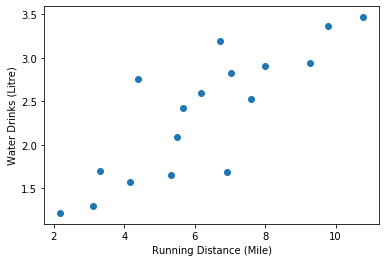

In [2]:
import numpy as np

# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])


import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

### Solution

In [5]:
# Reshape your data when passing to sklearn
### Passing 1-arrays as data is deprecated. Because of this,
### we must reshape our data using X.reshape(-1, 1) since our data has a single feature
print(X.reshape(-1, 1))

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]


In [8]:
# Obtain the best slope and intercept for the given data using sklearn
### Hints: The following documentation will be useful:
### LinearRegression
### Review the fit method in the above documentation
### Review the Attributes in the above documentation to see where to find the best slope and intercept
### Remember to reshape your data!

from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1)) # train the model (which is linear regression cna be train by X and Y)
print("Best slope=", lr_reg.coef_) # ask the model what is the best slope (after training)
print("Best y-intercept=", lr_reg.intercept_) #ask the model the best y intercept

Best slope= [[0.25163494]]
Best y-intercept= [0.79880123]


### Question:
Use the code you wrote above to predict how much water a runner will drink if they run for 5 miles

In [13]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

### Question: what are the metrics in order to evaluate Regression Model?
1. Mean-Squared-Error (MSE)
2. R-Squared: is a number between 0 to 1, close to one means better model


### Question:
What is the mean-squared-error of our Linear Regression Model?
##### Hints:
- Given the slope ($w_1$) and intercept ($w_0$), we can use the following formula to find the mean-square-error (MSE):
    - $MSE = f(w_1, w_0)=\frac{1}{N}\sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$
- How could the map function help you find y_predicted?

0.15385767404191164


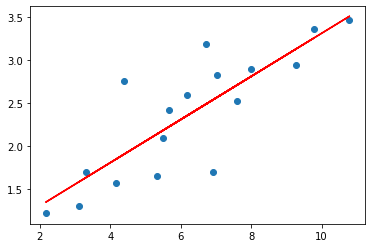

In [18]:
y_predicted = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, y_predicted ,'r')
error = sum([ (i-j)**2 for i, j in zip(Y, y_predicted) ]) / len(Y)
print(error)

MSE= 0.15385767404191095


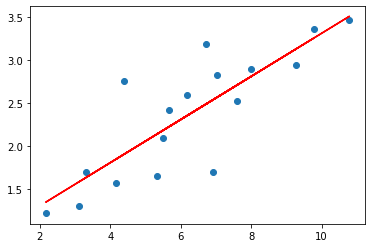

In [24]:
from sklearn.metrics import mean_squared_error

y_true = Y
y_pred = lr_reg.predict(X.reshape(-1,1))
plt.scatter(X, y_true) #plot the data points
plt.plot(X, y_pred, 'r') #plot the linear regression line
print("MSE=", mean_squared_error(y_true, y_pred)) #the closer to 0 the better

In [26]:
from sklearn.metrics import r2_score

y_true = Y
y_pred = lr_reg.predict(X.reshape(-1,1))
print(r2_score(y_true, y_pred)) #R squared = metric to represent how well our linear regression is. The closer to 1 the better

0.6928760302783605


In [27]:
# QL Review - Python way of getting slope intercept and MSE
import numpy as np

## Slope Intercept
def slope_intercept_LR(x, y):
    w1 = (np.mean([i*j for i, j in zip(x, y)]) - np.mean(x) * np.mean(y)) / (np.mean([i*i for i in x])) - np.mean(x) #this line maybe wrong check the last np.mean(x)
    w0 = np.mean(y) - w1.np.mean(x)
    return w1, w0

# print(slope_intercept_LR(X, Y))

## Mean Squared Error
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    sum_squared_error = sum([(i-j)**2 for i,j in zip(y_pred, y)])
    N = len(y)
    mse = sum_squared_error / N
    return mse

## Activity: How much companies' sales would be based on their product advertisement?
- We have a dataset of 200 companies, comprised of the top 150 companies, and the bottom 50 companies.
- The top companies (150) spent money to advertise their product on TV, radio and newspaper
- Based on their advertisments, they have calculated the sale that they had
- For the bottom companies (50), they want to have an estimation for the following: if they spend X dollar, Y dollar and Z dollar on TV, radio and newspaper, respectively, how much would their predicted sales be?
- We will use the top 150 companies in our dataset to train the model, and the bottom 50 companies to check that the model is working correctly


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv("dataset/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### TODO: Instansiate the model (Linear Regression) and train it
Use the top 150 companies to train the linear regression model. So the model does know about TV, Radio and Newspaper amount and also their sales for top 150 (75% of the dataset). However, we intentionally hide the sales for bottom 50 companies

In [40]:
df = pd.read_csv("dataset/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Get the top 150 companies to train the Linear Regression Model with
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]

# Instansiate the model (Linear Regression) and train it
print("Generating a linear regression on the top 150 companies (first one)")
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

print("\nPrinting the coefficient and y intercept of our first 150 sales")
print("Slope for each column=\t", sales_reg.coef_)
print("Y-intercept=\t\t", sales_reg.intercept_)

Generating a linear regression on the top 150 companies (first one)

Printing the coefficient and y intercept of our first 150 sales
Slope for each column=	 [ 0.04700012  0.17993257 -0.00140273]
Y-intercept=		 3.029766796293691


#### TODO: Predict the botton 50 companies' sales

In [47]:
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]
print("Predicting the sales of the bottom 50 companies (last ones)")
print(sales_reg.predict(X_test))

print("\nTrained score=\t", sales_reg.score(X_test, Y_test)) #score from the linear regression model
print("Actual scores=\t", r2_score(Y_test, sales_reg.predict(X_test))) #actual score

Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]

Trained score=	 0.8963519785440216
Actual scores=	 0.8963519785440216


### Question: If a new company spends 100, 100, and 20 dollars on TV, radio and newspaper, respectively on advertising, how much sales would you predict they have?

In [46]:
sales_reg.predict([[100, 100, 20]])

array([25.69498118])

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Get the top 150 companies to train the Linear Regression Model with
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

W = np.array([ 0.04700012, 0.17993257, -0.00140273]) #from sales_reg.coef_
y_intercept = 3.029766796293691 #y - intercept

print("Columns=",df.columns)
print("151st company's values=", df.values[151, 1:4]) #the TV, radio, and newspaper for the 151st company
print("151st company's sales=", df.values[151, 4]) #sales for the 151st company
print("SUM=", sum(df.values[151, 1:4] * W) + y_intercept)
print("Actual=", 0.04700012*121 + 0.17993257*8.4 + -0.00140273*48.7 + y_intercept)

Columns= Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
151st company's values= [121.    8.4  48.7]
151st company's sales= 11.6
SUM= 10.15990195329369
Actual= 10.15990195329369


# Day 3: Support Vector Machine
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_svm.ipynb


## Support Vector Machine (SVM)
SVM is a **supervised machine learning model for classification tasks**. It's really good at doing both classification and regression simultaneously.

If you have a lot of data that needs to be classified, an SVM can help you achieve that

For two dimensions (when we have two features), assume the target has two classes. The SVM will obtain the best line that seperates the data into two groups

![alt](../static/screenshots/day3-1.png)

## What are Support Vectors in SVM?
Support vectors are the **datapoints that lie closest to the decision boundary** (best line, seen in red below)

![alt](../static/screenshots/day3-2.png)

## Brain Health
We have medical data on brain health through the following Brain Health Dataset

- Two features (X1 and X2 columns) are given that are releted to brain chemistry:
    - Serotonin
    - Dopamine
- The target (y column) shows brain health by indicating having (-1) or not having (1) depression.
    - 1 means subject does not have depression
    - -1 means subject does have depression

In [4]:
import pandas as pd

df=pd.read_csv('dataset/SVM_Dataset1.csv', index_col=0)
print(df)

         X1        X2  y
0  2.947814  6.626878  1
1  2.530388  7.785050  1
2  3.566991  5.651046  1
3  3.156983  5.467077  1
4  2.582346  4.457777 -1
5  2.155826  6.222343 -1
6  3.273418  3.520687 -1


### Activity: Lets build our X_train and Y_train arrays

In [9]:
import numpy as np
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2))) #create an array from X1 and X2
print("X_Train=", X_train)

y_train=df['y'].values
print("\nY_Train=", y_train)

X_Train= [[2.947814 6.626878]
 [2.530388 7.78505 ]
 [3.566991 5.651046]
 [3.156983 5.467077]
 [2.582346 4.457777]
 [2.155826 6.222343]
 [3.273418 3.520687]]

Y_Train= [ 1  1  1  1 -1 -1 -1]


### Activity: Assign color and label to each target class
Hint: To do this, build two lists whose color/label values match with the values of the y_train array at the corresponding indices.

In [10]:
color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)

['b', 'b', 'b', 'b', 'r', 'r', 'r']


In [11]:
label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']


### Activity: Create a scatter plot of data with labels
Complete this activity groups of 3:

**Hints:**
- There's some functions in [matplotlib.pyplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html) that will help us here.
- How can the [enumerate function](https://www.geeksforgeeks.org/enumerate-in-python/) help us here?

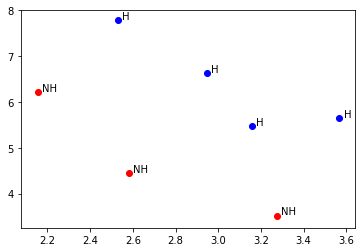

In [13]:
import matplotlib.pyplot as plt

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

## How to obtain the best line using sklearn
sklearn has an [SVM module](https://scikit-learn.org/stable/modules/svm.html#svm) you can import that will help you find the best fit line. Look into how the SVC and fit functions can help you

In [14]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=10) #C is a hyper parameter for this

# find the best fit line that separates our group
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

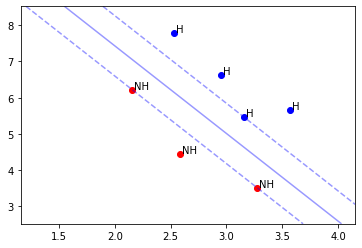

In [16]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [17]:
# Number of Support Vectors for each class:
svm_classifier.n_support_

array([2, 1], dtype=int32)

In [18]:
# What are those Support Vectors:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [20]:
# Obtain the slope (weight) and intercept for the best fit line equation: 

# a + b
weight=svm_classifier.coef_

# c
intercept=svm_classifier.intercept_

print("Weight=", weight)
print("Intercept", intercept)

Weight= [[2.90336685 1.20121959]]
Intercept [-14.73321143]


### From the above weight and intecept results, we can say the best line is:
$ax_1+bx_2+c =0$, where $a = 2.90336685$, $b = 1.20121959$ and $c = -14.73321143$

### Activity: Check that the points (3, 5) and (2, 7.5) are very close to the best line:
- Use a, b, and c that we just calculated

In [25]:
print(weight[0][0]*3 + weight[0][1]*5 + intercept[0])
print(weight[0][0]*2 + weight[0][1]*7.5 + intercept[0])

-0.017012931258699737
0.08266919494858271


### Activity: Am I healthy?
- I went to a medical lab and they measured my Serotonin and Dopamine which was 3 and 6, respectively.
- Can we use the SVM classifier to see if I am deppressed?

In [33]:
is_healthy = svm_classifier.predict([[3,6]])

if is_healthy == 1:
    print("Healthy")
else:
    print("Not Healthy")
    
print(weight[0][0]*3 + weight[0][1]*6 + intercept[0]) #weight can also be read as slopes

Healthy
1.1842066592050333


## SVM Training For Non-Linearly Separable Data
Based on the [SVM_Dataset2 dataset](https://render.githubusercontent.com/view/Datasets/SVM_Dataset2.csv), it is possible that we can not find a line that separates the two classes.

In [56]:
import pandas as pd

df2 = pd.read_csv('dataset/SVM_Dataset2.csv')
print(df2)

      x1  x2  y
0    7.0  20 -1
1    8.0  12 -1
2    9.0  19 -1
3   10.0  17 -1
4   11.0  15 -1
5   13.0  14 -1
6   14.0  12 -1
7   15.0  14 -1
8   15.0  17 -1
9   16.0  16 -1
10   4.0  15  1
11   5.5  12  1
12   7.0  10  1
13   8.0  10  1
14   9.0   9  1
15  10.0   8  1
16  11.0   5  1
17  12.0   7  1
18  12.0   9  1
19  13.0  10  1


In [58]:
import numpy as np
X1=df2['x1']
X2=df2['x2']
X_train=np.array(list(zip(X1,X2))) #create an array from X1 and X2
print("X_Train=", X_train)

y_train=df2['y'].values
print("\nY_Train=", y_train)

color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)

label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

X_Train= [[ 7.  20. ]
 [ 8.  12. ]
 [ 9.  19. ]
 [10.  17. ]
 [11.  15. ]
 [13.  14. ]
 [14.  12. ]
 [15.  14. ]
 [15.  17. ]
 [16.  16. ]
 [ 4.  15. ]
 [ 5.5 12. ]
 [ 7.  10. ]
 [ 8.  10. ]
 [ 9.   9. ]
 [10.   8. ]
 [11.   5. ]
 [12.   7. ]
 [12.   9. ]
 [13.  10. ]]

Y_Train= [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
['NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


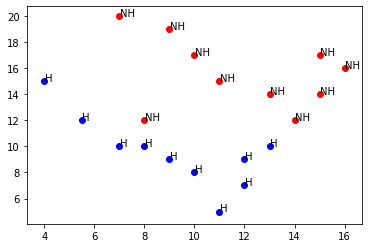

In [59]:
import matplotlib.pyplot as plt

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

### Kernels in SVM and their parameters:
#### Type of kernels:
- Linear
- Polynomial
- RBF (Gaussian)

There are two parameters for each of these:

Gamma (for RBF only). This is the "spread" of the decision region (kernel)
C (for all of them). This is the threshold for misclassifying data.
Read [this article on SVM parameters](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/) for more information! (Optional)

### What if the classes are unbalanced?
Let's go through this example together to learn about assigning class weights for SVMs: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

### Activity: Obtain which line (black or red) from the previous example will have the lowest error

#### Follow these steps:
1. Train two SVM models: one with class weights, and one without
2. Pass the dataset into your SVM models
3. Compare the model predictions with known classes
4. Report which one has the lowest mistakes (error rate)
5. Use the following code to get started (includes the dataset to use:)

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

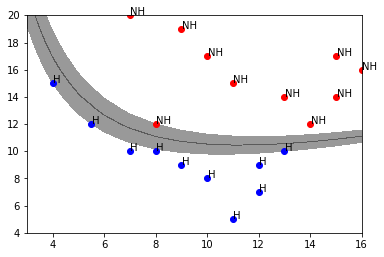

In [67]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('dataset/SVM_Dataset2.csv')


X1=df['x1']
X2=df['x2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values


# svm_classifier = svm.SVC(kernel='linear',C=10)

# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=10)

svm_classifier = svm.SVC(kernel='poly', degree=2, gamma='auto', C=10)

svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

## Article: SVC Parameters When Using RBF Kernel
https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/


In [69]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

#### Helper Methods
Do not need to understand this code block

In [72]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

#### Generate Data

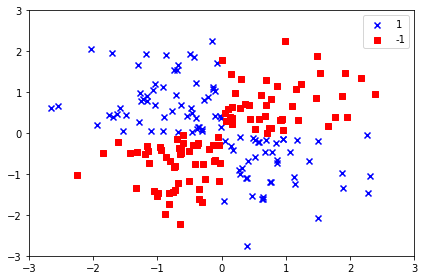

In [70]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Classify Using a Linear Kernel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


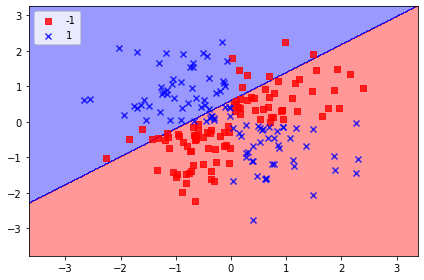

In [76]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Classify Using a RBF Kernel
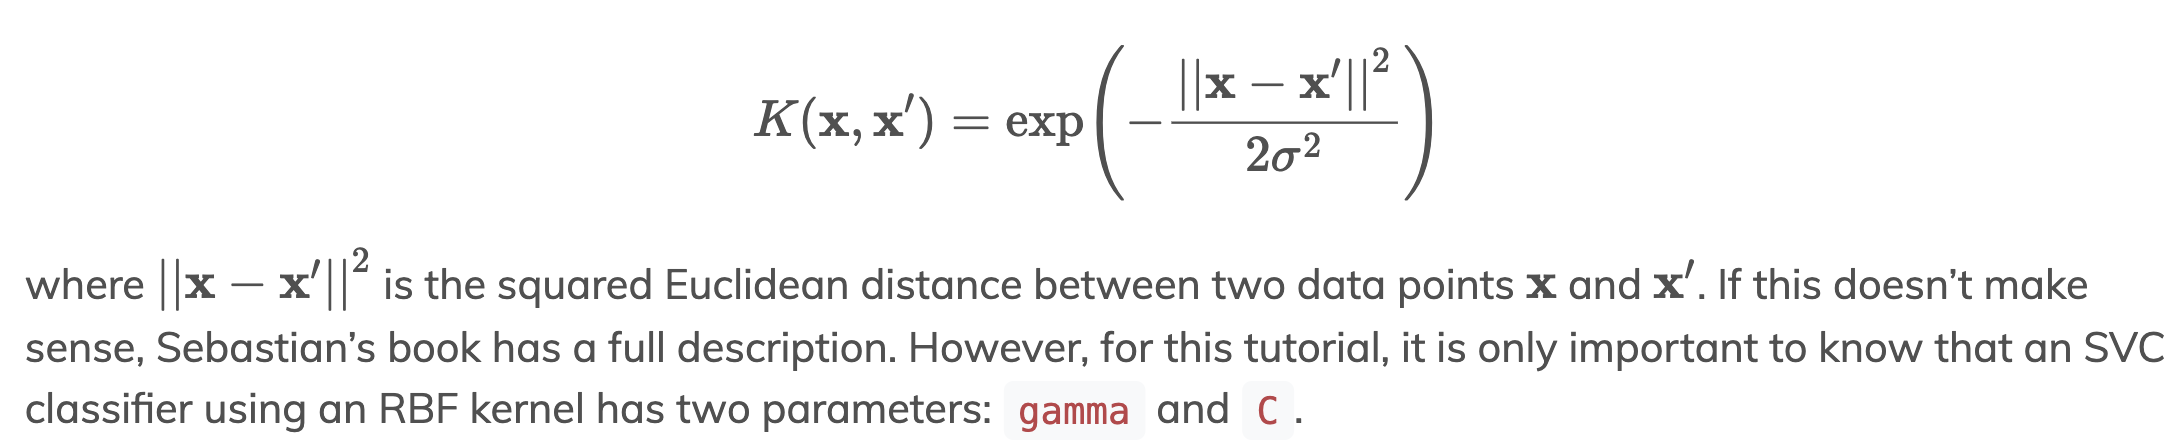

##### Gamma
gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points. We will see this very clearly below.

##### C
C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

##### Gamma
In the four charts below, we apply the same SVC-RBF classifier to the same data while holding C constant. The only difference between each chart is that each time we will increase the value of gamma. By doing so, we can visually see the effect of gamma on the decision boundary.

#### Gamma = 0.01
In the case of our SVC classifier and data, when using a low gamma like 0.01, the decision boundary is not very ‘curvy’, rather it is just one big sweeping arch.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


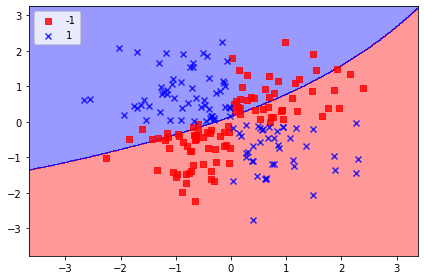

In [78]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gamma = 1.0
You can see a big difference when we increase the gamma to 1. Now the decision boundary is starting to better cover the spread of the data.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


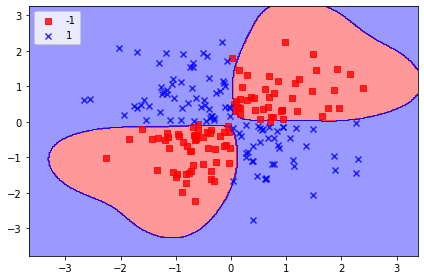

In [79]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gamma = 10.0
At gamma = 10 the spread of the kernel is less pronounced. The decision boundary starts to be highly effected by individual data points (i.e. variance).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


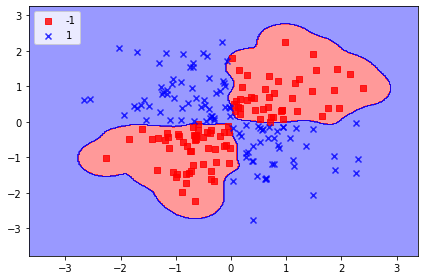

In [80]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Gamma = 100.0
With high gamma, the decision boundary is almost entirely dependent on individual data points, creating “islands”. This data is clearly overfitted.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


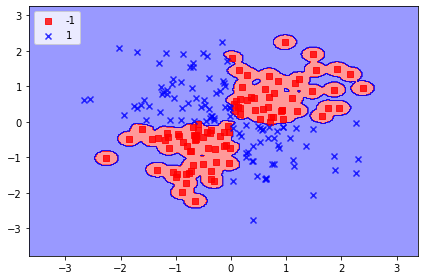

In [81]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C - The Penalty Parameter
Now we will repeat the process for C: we will use the same classifier, same data, and hold gamma constant. The only thing we will change is the C, the penalty for misclassification.

#### C = 1
With C = 1, the classifier is clearly tolerant of misclassified data point. There are many red points in the blue region and blue points in the red region.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


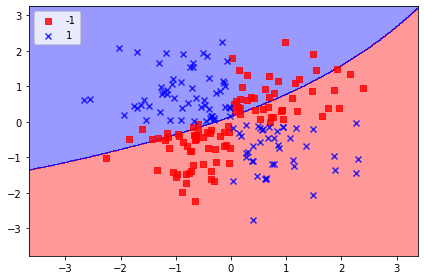

In [82]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### C = 10
At C = 10, the classifier is less tolerant to misclassified data points and therefore the decision boundary is more severe.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


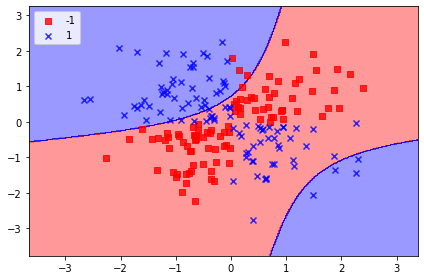

In [83]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### C = 1000
When C = 1000, the classifier starts to become very intolerant to misclassified data points and thus the decision boundary becomes less biased and has more variance (i.e. more dependent on the individual data points).

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### C = 10000
At C = 10000, the classifier “works really hard” to not misclassify data points and we see signs of overfitting.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


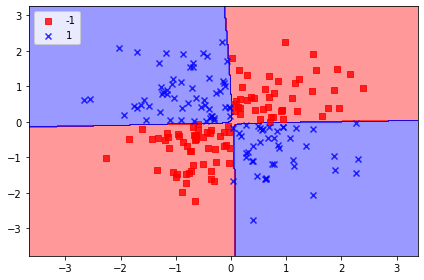

In [84]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### C = 100000
At C = 100000, the classifier is heavily penalized for any misclassified data points and therefore the margins are small.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


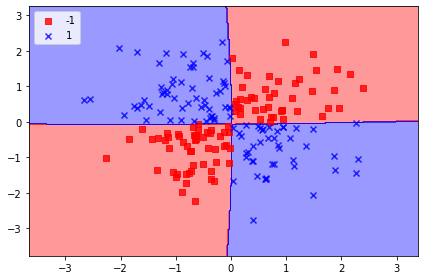

In [85]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Article 2: SVM: Separating hyperplane for unbalanced classes
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html


**Note** This example will also work by replacing SVC(kernel="linear") with SGDClassifier(loss="hinge"). Setting the loss parameter of the SGDClassifier equal to hinge will yield behaviour such as that of a SVC with a linear kernel.
For example try instead of the SVC:

`clf = SGDClassifier(n_iter=100, alpha=0.01)`

Automatically created module for IPython interactive environment


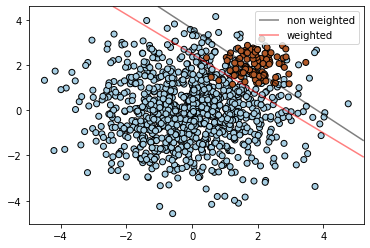

In [68]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

# Day 4: Logistic Regression
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_logistic_regression.ipynb

## What is Logistic Regression?
- Logistic regression is another **type of classifier**, which is different from linear regression
- Logistic regression **predicts whether something is True or False**, and the plot is an S-curve that goes from 0 to 1 (probability of False to True)

## How is it different from SVM?
- SVM **can not tell us what the probability is of being classified in a given category**
- For example, going back to the example we used in our SVM class, if my Serotonin is 3 and my Dopamine is 6, what is the chance that I would be considered happy? 90 percent? 60 percent? etc...
- Logistic Regression tell us this information!

#### Logistic Regression Video
Before we start the video, here are some concepts that are mentioned in the video:

- R-Squared (R^2): is a number between 0 to 1, close to one means better model for linear regression (i.e. the closer to one, the better fit the line is)

#### Multiple Regression: Regression model using 3+ variables
Let's watch this video: https://www.youtube.com/watch?v=yIYKR4sgzI8

## The dataset we use for Logistic Regression
- Dataset we will use today: [diabetes.csv](https://render.githubusercontent.com/view/Datasets/diabetes.csv)
- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset
- In particular, all patients here are females at least 21 years old of Pima Indian heritage
- Labels:
    - 1: diabetes
    - 0: no diabetes

## Activity: Fit a Logistic Regression Classifier on diabetes.csv
In groups of 3, complete the following steps:

1- Load the dataset: pd.read_csv('diabetes.csv')

2- Use these features: feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

3- Split the data to train and test: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

4- Obtain the statistics of y_test

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#1- Load the dataset
pima = pd.read_csv('dataset/diabetes.csv')

#2- Use these features
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
X = pima[feature_cols] #feature matrix

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #split data such that 75% of data is to train, and 25% of data is for testing. Random_state //33m

y_test.value_counts()
# print("X_train=", X_train, "\nX_test=", X_test, "y_train=", y_train, "y_test=", y_test)

0    130
1     62
Name: Outcome, dtype: int64

In [2]:
# Check the size of y_train and show that it is 75% of the whole dataset
len(y_train) / len(X)

0.75

## Activity: Build the classifier model with Logistic Regression and produce y_pred from X_test (features from test part)
Hint: read up on sklearn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module, specifically the fit and predict methods

1. Instantiate `logistic regression` model
2. Train the model with X_train and y_train
3. Pass X_test into predict method -> call the result as y_pred
4. print y_pred

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model -> We are telling the model that for 576 subjects, based on their Pregnancies, Insulin, BMI and Age,
# here are their diabities conditions (labels) in y_train
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
y_pred = logreg.predict(X_test)

print(y_pred) #based on the remaining 192 people (y_pred), 0 means they are okay

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [5]:
print(y_test.values.T)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [6]:
correct = 0
for i in range(len(y_pred)):
    if y_pred.tolist()[i] == y_test.tolist()[i]:
        correct+=1
print("Accuracy=", correct / len(y_pred))

Accuracy= 0.6927083333333334


## Activity: How many samples in y_test have diabetes, and how many do not?

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# create and plot a histogram based on y_test
plt.hist(y_test, bins=20)
plt.show()

# count how many are 0 and 1 (no diabetes, has diabetes)
y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

<Figure size 640x480 with 1 Axes>

0    130
1     62
Name: Outcome, dtype: int64

## Intro to Confusion Matrix
A confusion matrix is **a table that is used to describe the performance of a classifier on a set of test data where we know the true vales**. Essentially, we **use it to check how well our classifier's predicted values matched against the known values of the same data**.

The confusion matrix itself is a simple 2x2 matrix, but it's important we go over the terminology of each row/column in the matrix:
- **True Positives (TP)**: we correctly predicted a positive outcome (i.e. someone has diabetes, and we correctly predicted it)
- **True Negatives (TN)**: we correctly predicted a negative outcome (i.e. someone does not have diabetes, and we correctly predicted it)
- **False Positives (FP)**: we incorrectly predicted a positive outcome (i.e. someone does not have diabetes, and we incorrectly said that they did)
- **False Negatives (FN)**: we incorrectly predicted a negative outcome (i.e. someone has diabetes, and we incorrectly said that they do not)

![alt](https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/raw/b939f21b6e1e14018d5a589c0412428d3a5ce7fa/Notebooks/Images/blank_confusion_matrix.png)

## Activity: Write a function that calculates the confusion matrix for the Pima Diabetes dataset
- How many 0s (no diabetes) in y_test are predicted correctly as 0 (no diabetes) in y_pred?
    - True Positives
- How many 0s (no diabetes) in y_test are predicted incorrectly as 1 (diabetes) in y_pred?
    - False Positive
- How many 1s (diabetes) in y_test are predicted incorrectly as 0 (no diabetes) in y_pred?
    - False Negative
- How many 1s (diabetes) in y_test are predicted correctly 1 (diabetes) in y_pred?
    - True Negative

In [8]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    # create a blank 2x2 confusion matrix (all 0s)
    conf_matrix  = np.zeros((2, 2))
    # indices that will create all confusion matrix values
    # TP (1,1), TN (0,0), FP (0, 1), FN (1, 0)
    for row_index in [0, 1]:
        for column_index in [0, 1]:
            counter = 0
            # iterate through all elements of y_test, y_predict,
            # which are all values of either 0 or 1
            for (yt_index, yp_index) in zip(y_test, y_predict):
                # comparing the elements of y_test and y_predict with each confusion matrix value (TP, TN, FP, FN),
                # and if there's a match for the confusion matrix value we're looking at, increment the counter
                if (yt_index == row_index) & (yp_index == column_index):
#                     print(row_index, "=", yt_index, "\t", yp_index, "=", column_index)
                    counter += 1
            # Add the total number of elements for the confusion matrix value,
            # then look at the next value in the loop
            conf_matrix[row_index, column_index] = counter 
    return conf_matrix

# print the result of calculating our confusion matrix
print(comp_yt_yp(y_test, y_pred))

[[118.  12.]
 [ 47.  15.]]


In [9]:
def get_confusion_matrix(y_test, y_predict):
    true_negative = 0
    true_positive = 0
    false_negative = 0
    false_positive = 0
    y_test = y_test.values.T
    
    for i in range(len(y_predict)):
        if y_predict[i] == y_test[i]:
            #see if they match
            if y_predict[i] == 0:
                #if they match and are both 0
                true_negative += 1
            else:
                true_positive += 1
        else:
            # if they don't match
            if y_predict[i] == 0:
                false_negative += 1
            else:
                false_positive += 1
    return [[true_negative, false_positive], [false_negative, true_positive]]

get_confusion_matrix(y_test, y_pred)

[[118, 12], [47, 15]]

## Easier way to compute elements of Confusion Matrix using sklearn

In [10]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


In [11]:
print("Accuracy=", (TP + TN) / len(y_pred))

Accuracy= 0.6927083333333334


## Activity: Apply these two methods to Pima Indian Diabetes dataset
After logreg.fit(X_train, y_train), call the trained model using:
- logreg.predict(X_test)
- logreg.predict_proba(X_test)
- In order to know which column is which labels: `logreg.classes_`

Notice the difference in the results, and discuss it with your peers. What does each method do with the data?

In [26]:
print(logreg.predict(X_test[:10])) #analyze the first 10 subjects
print(logreg.predict_proba(X_test[:10])) #shows the percent how okay the person is is
print(logreg.classes_)

[0 0 0 0 0 0 0 1 0 1]
[[0.63247571 0.36752429]
 [0.71643656 0.28356344]
 [0.71104114 0.28895886]
 [0.5858938  0.4141062 ]
 [0.84103973 0.15896027]
 [0.82934844 0.17065156]
 [0.50110974 0.49889026]
 [0.48658459 0.51341541]
 [0.72321388 0.27678612]
 [0.32810562 0.67189438]]
[0 1]


## The difference between .predict() and .predict_proba for logistic reg classifier¶
- [**predict**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) will **return a list of 0 and 1 values** for a given sample
- [**predict_proba**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) will **return a list of lists where each element in the list is a probability estimate**: the probability of the element being a 0 or 1

### Resources:
https://www.ritchieng.com/machine-learning-evaluate-classification-model/

# Day 5 Model Evaluation
- So far, learned about two classifiers: //21m
    - SVM
    - Logistic Regression
- How we can evaluate which model performs better for our classification task? 

## Lets review the confusion matrix we obtained from logistic regression model for diabetes dataset
![Confusion Matrix](../static/screenshots/day5-1.png)

## Classifier Model Evaluation Metrics
### What is accuracy, recall, precision, Specificity and F1-score?¶
Accuracy, recall, precision, Specificity and F1-score are all obtained from Confision Matrix elements known as : TN, FP, FN, TP
- Accuracy: overall, **how often is the classifier correct**? -> $accuracy = \frac {TP + TN}{TP+TN+FP+FN}$
- Classification error: overall, **how often is the classifier incorrect**? -> $error = 1- accuracy = \frac {FP + FN}{TP + TN + FP + FN}$
- Recall: when the **actual value is positive**, how often is the prediction correct? -> $recall = \frac {TP}{TP + FN}$
- Precision: When a **positive value is predicted**, how often is the prediction correct? -> $precision = \frac {TP}{TP + FP}$
- Specificity: When the **actual value is negative**, how often is the prediction correct? -> $Specificity = \frac {TN}{TN + FP}$
- `F1-score = 2 x (Precision x Recall )/(Precision + Recall)`

#### Note: Accuray, precision, recall, and f1_score are better the closer they are to 1

## Activity: Write a function that returns Accuray, Precision, Recall, F1-score from Confision Matrix

In [74]:
from sklearn import metrics
import numpy as np

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

def evaluate_model(confusion):
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    accuray = ((TP + TN) / float(TP + TN + FP + FN))
    precision = TP / float(TP + FP)
    recall = TP / float(FN + TP) #important to be high in medical field
    f1_score = 2 * precision * recall / float(precision + recall)
    return (accuray, precision, recall, f1_score) # All of these are better if they are closer to 1


print(evaluate_model(confusion))

[[87 43]
 [24 38]]
(0.6510416666666666, 0.4691358024691358, 0.6129032258064516, 0.5314685314685315)


## Activity (Reminder): How can we obtain y_pred (whose elements are 0 and 1) from y_pred_prob:
- y_pred_prob = logreg.predict_proba(X_test)
- Goal: from y_pred_prob -> obtain y_pred
- Steps: For given y_pred_prob, check if the first element is > 0.5 then returns 0 else return 1

In [75]:
y_pred_prob = logreg.predict_proba(X_test)
# is 0.5 a good threshold or not
threshold = 0.5
correct = 0
result = []
for i in range(len(y_pred_prob)):
    current_prob = y_pred_prob[i]
    if current_prob[0] > threshold:
        result.append(0)
        correct+=1
    else:
        result.append(1)
        
correct / len(X_test)

0.859375

## Activity: Change the threshold of Logistic Regression (y_pred_prob) to get new confusion matrix and better model performance
- The question now is which threshold is better?
- To do this:
    1. Train `logreg = LogisticRegression()` and get `y_pred_prob = logreg.predict_proba(X_test)`
    2. The second column of `y_pred_prob` is the probability that a subject be diabetes
    3. Plot histogram of second column. Hint: `plt.hist(y_pred_prob[:, 1], bins=8) plt.show()`
    4. Count how many of y_train is 0 how many is 1. Define thershold as:
        - `threshold = y_train.value_counts()[1] / len(y_train)`
    5. Write a function that returns 0 if `y_pred_prob[:, 1]` is less than threshold, else returns 1 for all elements in y_pred_prob
    6. Calculate the Confuction Matrix by `confusion = metrics.confusion_matrix(y_test, y_pred)`

### My answer

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Threshold= 0.3576388888888889

Previous confusion=
 [[118  12]
 [ 47  15]]
Previous evaluation= (0.6927083333333334, 0.5555555555555556, 0.24193548387096775, 0.3370786516853933)

New confusion=
 [[118  12]
 [ 47  15]]
New evaluation= (0.6510416666666666, 0.4691358024691358, 0.6129032258064516, 0.5314685314685315)


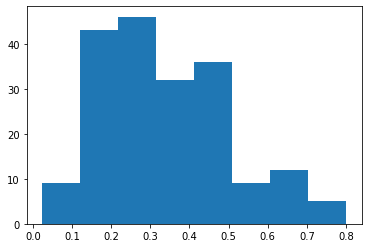

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)
#3.
plt.hist(y_pred_prob[:, 1], bins=8) 

#4.
threshold = y_train.value_counts()[1] / len(y_train)
print("Threshold=", threshold)
#5.
correct_count = 0
y_pred = []

# threshold = 0.5
for i in range(len(y_pred_prob)):
    current_prob = y_pred_prob[i]
    if current_prob[1] < threshold:
        y_pred.append(0)
    else:
        y_pred.append(1)
        correct_count+=1
#6.

# Previous threshold from day 4
prev_logreg = LogisticRegression()
prev_logreg.fit(X_train, y_train)
y_pred_prev = logreg.predict(X_test)
prev_confusion = metrics.confusion_matrix(y_test, y_pred_prev)
print("\nPrevious confusion=\n", prev_confusion)
print("Previous evaluation=", evaluate_model(prev_confusion))

# New threshold
print("\nNew confusion=\n", prev_confusion)
print("New evaluation=", evaluate_model(confusion)) #at the price of 4% lower accuracy, you get more recall

plt.show()

### Milad's answer

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('dataset/diabetes.csv')
print(pima.columns)
print(pima.head())

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

X = pima[feature_cols]
# print(X)
# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
import numpy as np

confusion = np.array([[80, 50], [16, 46]])

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Accuray = ((TP + TN) / float(TP + TN + FP + FN))

Precision = TP / float(TP + FP)

Recall = TP / float(FN + TP)

F1_score = 2*Precision*Recall/float(Precision+Recall)

print((Accuray, Precision, Recall, F1_score))

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


### Comparison
- With **threshold = 0.5** -> `confusion = np.array([[118., 12.], [ 47., 15.]])`
- With **optimal threshold** -> `confusion = np.array([[80, 50], [16, 46]])`

In [80]:
# With threshold 0.5
print((Accuray, Precision, Recall, F1_score))

# With Optimal Theshold
print((Accuray, Precision, Recall, F1_score))

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)
(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


## Cross-Validation
- Normally in a machine learning process, **data is divided into** training and test sets; the **training set is then used to train the model** and the **test set is used to evaluate the performance of a model**
- It is possible that the accuracy obtained on one test is very different to accuracy obtained on another test set using the same algorithm
- To see the model performance, we use **K-Fold Cross-Validation** for performance evaluation where K is any number
- Suppose we want to perform 5-fold cross validation

![Cross Validation](../static/screenshots/day5-2.png)

## Lets obtain Accuracy and F1-Score for 5-fold cross validation based on diabetes dataset

In [90]:
from sklearn.model_selection import cross_val_score 
import pandas as pd
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('dataset/diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

print(y.value_counts()[0])
print(y.value_counts()[1])

logreg = LogisticRegression(class_weight={1: 500/268})
#logreg = LogisticRegression(class_weight={1: y.value_counts()[0]/y.value_counts()[1]})
# logreg = LogisticRegression()

all_accuracies = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='accuracy') #cv=5 is the 5-fold
print("Accuracy=", all_accuracies)
print("Accuracy mean", all_accuracies.mean())

print()

all_f1 = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='f1') #f1
print("F1_scores=", all_f1)
print("F1_mean=", all_f1.mean())

500
268
Accuracy= [0.64935065 0.65584416 0.64935065 0.69281046 0.65359477]
Accuracy mean 0.6601901366607248

F1_scores= [0.578125   0.55462185 0.54237288 0.624      0.576     ]
F1_mean= 0.5750239460190857


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

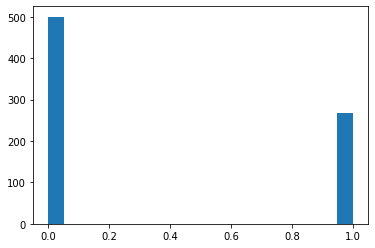

0    500
1    268
Name: Outcome, dtype: int64

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(y, bins=20)
plt.show()

y_pd_series = pd.Series(y)
y_pd_series.value_counts()

## How to choose Models based on Cross-Validation
- We want to have low variance result for CV -> pick a model that has lower variance
- If two models have low variance result for CV -> pick a model that has higher mean

## Grid Search for Parameter Selection
- Machine learning models have hyper-parameters. To know which values of hyper-paramaeters give the best result we need grid search
- Question: what does grid search mean?

### Big Note:
- All of these metrics, including confusion matrix, accuracy, precision, recall, f-1 score are for a classifier model **(e.g. SVM, logistic regression)** not regression model. For regression model **(e.g. linear regression)**, the metrics are r squared and MSE

### Resources
Optimal threshold is obtained from ROC and AUC curve where axises are TPR and 1-FPR : https://www.ritchieng.com/machine-learning-evaluate-classification-model/